<a href="https://colab.research.google.com/github/chris-lovejoy/CodingForMedicine/blob/main/exercises/Stroke_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Healthcare dataset - testing 2

# Predicting Strokes from Admission Data

**In this exercise, we will train different machine learning models to predict whether a patient has a stroke, based on background clinical information.

This exercise uses a [stroke dataset from Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

This is a **classification problem** because we're asking the algorithm to classify samples into one of two classes: **stroke** or **not stroke**.

In this exercise, we'll learn how to:
- **Download data** and **load it into our Jupyter Notebook**
- Import useful libraries like **[pandas](https://pandas.pydata.org/docs/)**, **[sci-kit learn](https://scikit-learn.org/stable/)**, and **[imbalanced-learn](https://imbalanced-learn.org/stable/)**. (Click the links for the documentation - which is really helpful reference!)
- **Clean our data**, and **modify it with sci-kit learn pipelines**: an approach that helps us clean and transform our data into a more effective form for machine learning algorithms to interpret and learn with.
- Deal with **class imbalance**: where we have more data points in one class than another (e.g. more patients without stroke than with stroke)
- Quantify our model with **various metrics**


## Part 1: Downloading and Importing Data


To begin with, let's set up our notebook with the necessary packages and grab the data from Kaggle!

One option is to set up a virtual environment on your computer. Popular virtual environments for Python are Venv and Conda. Here are some guides on how to do so: [**1**](https://protostar.space/why-you-need-python-environments-and-how-to-manage-them-with-conda) and [**2**](https://realpython.com/python-virtual-environments-a-primer/).

The easiest way to get started, however, is to run a "command line argument" directly within our Jupyter notebook. We can do that by adding "%" or "!" to the start of our Jupyter Notebook cell. (We don't have to run it in a separate terminal.)

In [1]:
%pip install pandas numpy matplotlib seaborn imbalanced-learn

This ensures our environment/colab instance has installed the latest versions of several commonly used data science packages.

In [2]:
# Setup matplotlib to display plots correctly within pandas
%matplotlib inline

# Import packages into our runtime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

### Download data from Kaggle

To train a machine learning model, the first thing we need is data.

There are various open-source datasets available on the internet. Great sources of datasets include [Kaggle](https://www.kaggle.com/), [Papers with Code](https://paperswithcode.com/datasets) and [data.world](https://data.world/datasets/health).

For this exercise, we're using a dataset available on Kaggle. You can view information about the dataset and download it [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). (You may need to create a Kaggle account, which is definitely worth doing - Kaggle is great.)

There are two ways to get our data - either via the a "command line argument" or manually (by going to Kaggle and downloading it).


#### **Option #1. Using Kaggle CLI Command**

Those who have downloaded and set up the kaggle CLI (Command Line Interface) can run the following command to download the dataset:


In [3]:
# Download the stroke prediction dataset into the ./data folder
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset --path ./data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [5]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


#### **Option #2. Download manually**

Alternatively, you can view information about the dataset and download it [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

#### Downloading and moving our data:
Once we've downloaded the data, we're looking for the .csv file (it may be within a .zip file, which needs unzipping). CSV stands for 'comma-separated value' and means that each row of data is stored with values separated by commas. You can open the file in a 'plain text' editor (like Notepad (windows) or TextEdit (Mac)) to see what this looks like.

Where we put that file will depend on whether we're running Jupyter Notebook locally or in Google Colab. These options are discussed in the Jupyter Notebook setup exercise.

**If you are using Google Colab**, you need to:

- Make sure you are connected to a runtime (click Connect in the top right if you aren't)
- Select the 'Files' folder on the left-hand tab
- Drag our downloaded  'healthcare-dataset-stroke-data.csv' file into the Files tab (it should show the file uploading in the bottom left, and then you'll see 'healthcare-dataset-stroke-data.csv' within the Files tab).

**If you are running Jupyter Notebook on your local computer**, you can simply:

- Drag our 'healthcare-dataset-stroke-data.csv' file into the same folder (aka. directory) as this Jupyter Notebook.



## Part 2: Data Exploration
Now we have the data downloaded; we need to load this into a data frame to explore it and perform further analysis.

We can either do this by unzipping the dataset or just loading it directly with pandas:

In [6]:
# No need to unzip the file - we can load the .csv file within directly into a DataFrame (commonly notated as `df`)
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df = df.rename({"Residence_type": "residence_type"}, axis=1)

It is good practice to explore what data we are actually dealing with and get a *feel* for it. We should check for missing data, what data is present, and relevant data types!

There are many ways of doing this with `pandas` ([API](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)) - the most useful and commonly used methods being `head()`, `info()`, `describe()` initially:

In [7]:
# Let's have a look at the first 10 entries of the dataset
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


 **Execute the 2 following commands, *df.info()* and *df. describe()*, and describe the returned results and the difference between the two commands**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Describe is useful for looking at continuous data (i.e. int or float datatypes) - we can see it also has a look at data which is stored as 1's and 0's, as well as ID's (i.e. hypertension, heart_disease, and stroke and id columns)

**Below, can you return a summary of the columns `age,` `avg_glucose_level,` and `bmi` only**. Try to do this without looking at the cell below.

In [10]:

df[["age", "avg_glucose_level", "bmi"]].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


By passing a list of column names to the DataFrame, we can select certain parts of the DataFrame we want to understand the summary of.

### Graphing

We can explore the data further by:

- Plotting the distribution of some continuous variables
- Number of cases of stroke vs non-stroke to check whether the dataset is imbalanced
- Plotting discrete variables using a bar chart

#### Continuous Variables

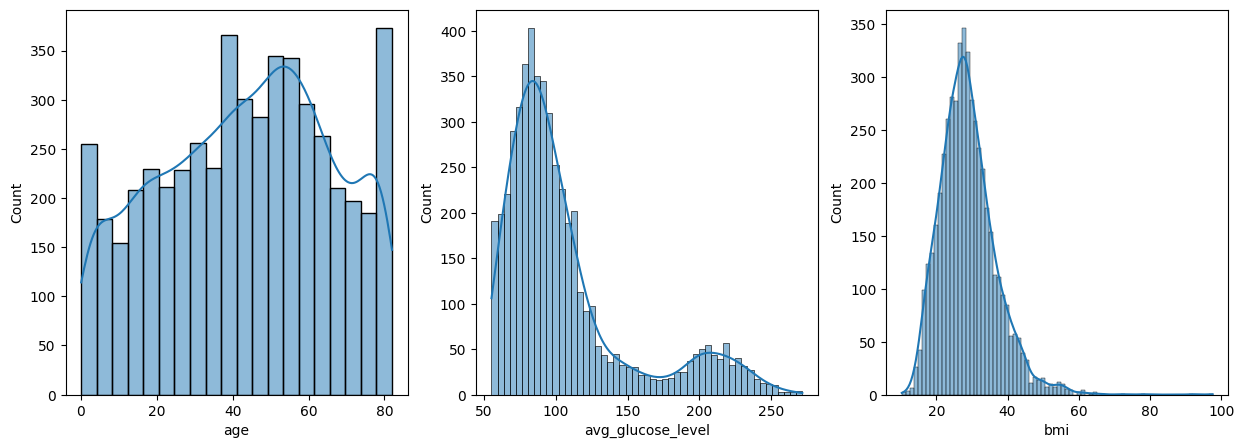

In [11]:
continuous_features = ["age", "avg_glucose_level", "bmi"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for idx, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, ax=ax[idx], kde=True)
plt.show()

To show the distribution of a variable, we can use a histogram. In this case, we want to create a chart that displays three histograms.

We define the variables we wish to plot first. Using the `subplots` method, we define the chart dimensions of 1 row and three columns and set the figure size in inches, in this case, 15 inches by 5 inches. The `subplot` method returns 3 axis objects specified by each chart and a figure representing the whole chart.

We loop around the variables we wish to plot. For each variable, we invoke the `histplot` method of the seaborn package. Specifying the DataFrame, the variable to be plotted across the x-axis, we specify the axis object for the chart within the plot. Lastly, we set the 'Kernel Density Estimation to `True` Without getting too technical; this smoothes out the curve.

Now let's show the proportion of patients who have had a stroke to those who haven't. Let's show a pie chart to illustrate this.

First, we want to obtain the frequencies of those who've had a stroke and those who haven't. We can do this for a single variable using the `value_counts()` method.

In the cell below, use the `value_counts` method to find the frequency of those who have had strokes and those who haven't.

 By passing `normalize=True` as an argument, we can normalise the dataset, changing the data values between 0 and 1. We can then see the relative differences between the data frequencies, which is useful for comparison.

Modify the cell above to see the difference between passing the keyword argument `normalize=True` and not doing so.

We can use the `plot` method from pandas to plot this data. Note that this method uses matplotlib, a data visualisation library under the hood, and we can use methods from that library, like adding labels.

Text(0, 0.5, 'Percentage')

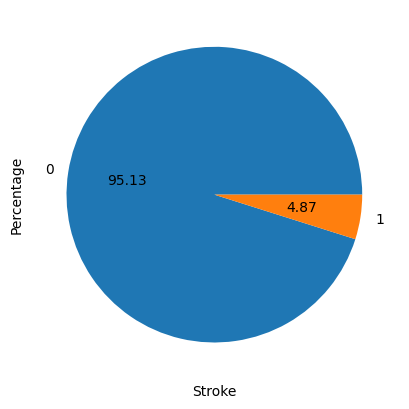

In [12]:
df["stroke"].value_counts(normalize=True).plot(kind="pie", autopct="%.2f")
plt.xlabel("Stroke")
plt.ylabel("Percentage")

Above, we've specified the chart as a piechart and then specified we only want to show the percentage to 2 decimal places `%.2f` means to specify to 2 decimal places.

We can see that most of our dataset has not had a stroke - infact less than 5% have.

We will explore the implications of this later...

#### Discrete Variables

We can also use histograms to plot the distribution of discrete variables. A discrete variable is one where the values have specific labels like never smoked vs smoked.

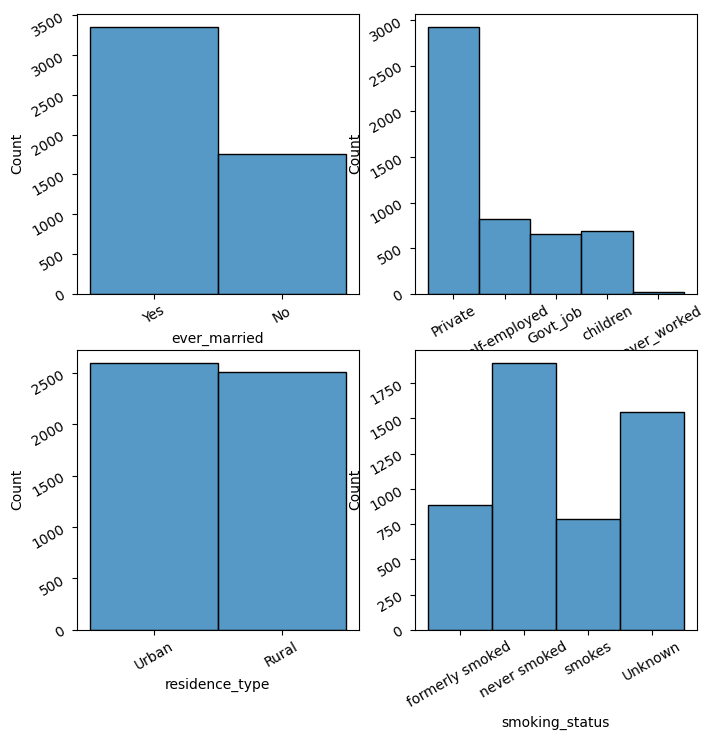

In [13]:
discrete_features = ["ever_married", "work_type", "residence_type", "smoking_status"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for idx, axis in enumerate(fig.axes):
    sns.histplot(df[discrete_features[idx]], ax=axis)
    axis.tick_params(labelrotation=30)


plt.show()

Similarly, we can create a subplot or plot with many charts like before. We specify 2 rows and 2 columns with a figure size of 8 inches by 8 inches.

This time we're using the `fig,` which represents the whole figure and specifically the axes objects on `fig. axes`. We loop over these axes for each subplot. We then use the `histplot` function to plot the bar charts. We pass in the subset of the DataFrame for each discrete variable and specify the axes object for each one.

Using the `tick_params` method on the `axis` object and passing in `labelrotation=30`, we can slightly rotate the labels 30 degrees.

## Part 3: Preparing our Data for Model Training
Now we have a feel for our dataset, we can begin building a useful model to try and predict outcomes.

### 3a. Data Pre-processing

One common problem with real-world datasets is missing data or outliers. We can check the number of missing values with the `isna()` function.
This will return a table that shows whether each cell is a `NaN` or not. A `NaN` value is a special floating-point value for values that are not available (i.e., missing data) or a mathematical operation that isn't possible to do if we're calculating something.

We can find the total number of `NaN` values in each table column using the following cell.



In [14]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,0
bmi,201


We can see we are missing 201 BMI values: at this point, we have two options: to drop the missing data rows or to _impute_ their values. In this case, we will go for the latter!

Imputing is where you estimate missing values based on the known values from other data points.

More complex approaches to doing this can be done using the [`sklearn.imputer`](https://scikit-learn.org/stable/modules/impute.html) classes.

**Calculate the mean of the BMI column and use it to fill in missing values**

In [15]:
# First calculate the average
mean_bmi = df["bmi"].mean()

# Now fill missing values with this mean
df["bmi"] = df['bmi'].fillna(mean_bmi)

# Check that our commands have worked!
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,0
bmi,0


In [16]:
# We can get rid of 'ID' column, this isn't needed!
# df = df.drop(columns=["id"])

# We can then develop our `X` and `y` sets
X = df.drop(columns=["stroke"])
y = df["stroke"]

 Can you check in the cell below if we have the right shape of data - we should have 5110 rows, with 10 features in the X set - and 5110 rows where only a column of 1 or 0 in the y set.

In [17]:
print()
print()

Using the shape attribute, we can find out about the shape of the DataFrame columns. Using the `unique()` method, we can also return what unique values in the y set are.

In [18]:
print(X.shape)
print(y.shape)
print(y.unique())

(5110, 11)
(5110,)
[1 0]


#### Train-Test Splits

Using our input **features** we have stored in the variable `X` (gender, age, hypertension, heart disease, marriage, work type, residence type, glucose level, BMI, smoking status), we can try to predict the output class for each case (`y').

However, to train and test our models, we need to split the data into `train` and `test` bins to ensure that the models we make haven't _'seen'_ the test data to ensure they're working as we want.

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/0*VH8IKfRP4mewrsTo.png)
<sup>[image source](https://medium.com/@rinu.gour123/train-and-test-set-in-python-machine-learning-how-to-split-58029a0d657b)</sup>

It's sort of like running an exam - it is pointless if everybody has already seen the questions beforehand!

To do this, we import the function `train_test_split` from `sklearn`, and then split the data up as below - we set the test_size to be 20% of the overall dataset size:

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2023
)

You may notice we're passing a variable here called **"random_state"**. This means that if we were to run this multiple times with the same data we'd get the *exact same* random split. This means we can achieve randomness, but also be able to reproduce our results.

### 3b. Data Encoding
Many machine learning algorithms are sensitive to how **continuous data** (e.g. Age, BMI) and **categorical data** (e.g. Hypertension, Smoking status) are provided. Let's define what those categories are, and how we can handle them.

### 1 - Continuous data

For **continuous data**, it's important to consider **normalising** and **standardising** the data:

#### Min-Max Scaling

Min-Max scaling, also known as **normalisation**, is where the range of values is compressed to a set range: usually between 0 and 1 (neural networks, in particular, tend to expect their inputs to be between this range). However, this method is sensitive to outliers as the smallest and largest values are used for 0 and 1 in the new scale, respectively. Let's see what happens if we min-max scale average glucose values:

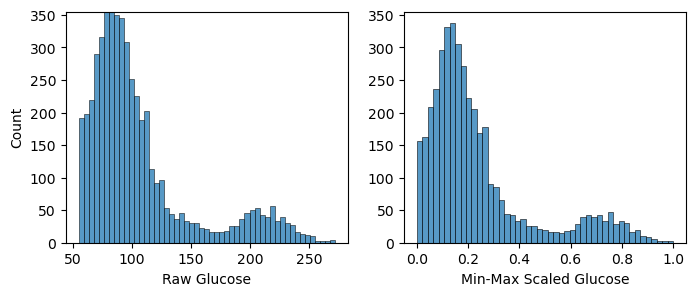


#### Standardisation

Machine learning algorithms tend to perform worse if data have very different scales. For example, if we look at our BMI data, we can see that the range of values is quite wide: the lowest value is 10.3 - where the largest is 97.6! However, most values lie between 20 and 40; this large can trip up some algorithms.

To combat this, we can "standardise" the data to a new scale, where 0 is average. For example, we can do this to our BMI below (look at the x-axis scale):

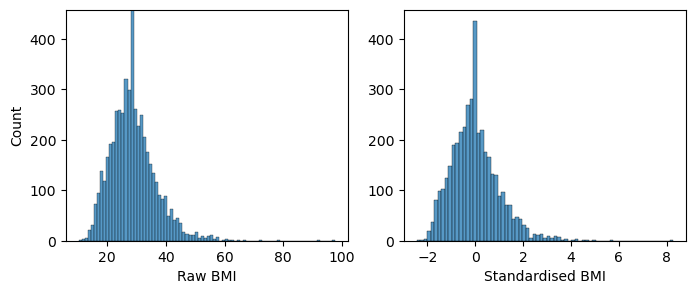

Now the average of $28.9$ has been shifted to $0$, and we have negative values! The advantage of this method is that the values of outliers are suppressed, and they have a reduced size.


In our case, we'll use the `StandardScaler` function from `sklearn`. Let's import and define it:

In [20]:
from sklearn.preprocessing import StandardScaler
numerical_transformer = StandardScaler()

Now let's look at the other type of data: **categorical data**.

### 2 - Categorical Data
Here, we want to consider the different types of categories, which could be named, ordinal or nominal.

#### Named Categories

Machine learning algorithms and neural networks at a low-level can't work on text values (it has no inherent meaning to them), and we need to convert these into a number representation for them: for example, if we look at `gender`, we have `Male` and `Female` as strings. We need to convert these into numeric equivalents. We can do this by hand in Python by running something like:

```python
df['Gender'] = df[df['Gender'] == 'Male] = 0
df['Gender'] = df[df['Gender'] == 'Female] = 1
```

This becomes increasingly cumbersome and time-consuming if doing this over a large range of values: `sklearn` provides us some tools to do this for us: we can use the `LabelEncoder` or `OrdinalEncoder` to convert labels to numbers automatically!

We'll use `OrdinalEncoder` instead of `LabelEncoder` as it can process multiple columns simultaneously! Let's import it to get ready:

In [21]:
from sklearn.preprocessing import OrdinalEncoder
label_transformer = OrdinalEncoder()

#### Ordinal Categories

`LabelEncoder` works well for cases where we only have two categories. However, what about cases where the order (i.e., ordinal data) of the values is important: for example, the order of income classes low, medium, and high should be 0, 1, 2, for example, and not 2, 0, 1? The `OrdinalEncoder` can handle this for us in cases where the order matters by explicitly which value should be mapped to a certain number.



#### Nominal Categories

Finally, some categories are unordered, however, and we **do not** want them to be labeled as a rank. Rank implies a relative comparison where one item is considered higher or lower than another. For example, it would be problematic if we started treating blood type or ethnicity as ordinal data - as one class would be treated as a 'greater' value as another.

In our data, we have work type (`Private, Self-employed, children, Govt_job, Never_worked`) as categorical data that we want as nominal (unordered) categories. We can use "One Hot Encoding" to process into "one hot" columns, where each category is a binary yes/no (1/0), such as in the table below. This means the machine learning algorithms will look at each class individually.

| Work Category | →| work_private | work_selfEmployed | work_children | work_govt | work_never |
| ------------- | - | ------------ | ----------------- | ------------- | --------- | ---------- |
| private       |  | 1            | 0                 | 0             | 0         | 0          |
| selfEmployed  |  | 0            | 1                 | 0             | 0         | 0          |
| children      |  | 0            | 0                 | 1             | 0         | 0          |
| govt          |  | 0            | 0                 | 0             | 1         | 0          |
| children      |  | 0            | 0                 | 1             | 0         | 0          |
| never         |  | 0            | 0                 | 0             | 0         | 1          |

The final encoder `sklearn` tools we'll use for this is `OneHotEncoder`, so let's import that too:

In [22]:
from sklearn.preprocessing import OneHotEncoder
nominal_transformer = OneHotEncoder()

### Defining our column types

We need to define all the columns in our dataset based on how we want to pre-process them: as numerical variables, as nominal (categorical) variables, or as named "labelled" (categorical) variables. We won't need to do anything with some variables so that we can include them as `pass_columns.`

In the cell below, can you create a list of column names that have numerical and nominal values that would be relevant to our training model?

Below we define the numerical columns as `age`, `avg_glucose_level` and `bmi` and the nominal columns as `work_type` and `smoking_status`.

In [23]:
numerical_columns = ["age", "avg_glucose_level", "bmi"]
nominal_columns = ["work_type", "smoking_status"]

The data within the columns `hypertension` and `heart_disease` are in a good form for machine learning training because each value corresponds to a 0 or a 1 if they have or do not have hypertension or heart disease.


In [24]:
pass_columns = ["hypertension", "heart_disease"]

**Define the label_columns to include the suitable columns which have strings, and we want to convert to labels. Have a look at the DataFrame and decide!**

Below we take `gender`, `ever_married` and `residence_type` as columns suitable for converting strings into labels.

In [25]:
label_columns = ["gender", "ever_married", "residence_type"]

### 3c. using Data Pipelines

We can use `sklearn` pipelines and column transformers in order to easily apply these methods to large datasets with different datatypes and many columns easily!

A pipeline in machine learning refers to a sequence of data processing steps, including transformations and model fitting, that are applied in a specific order. It allows you to conveniently organize and automate multiple steps of data preprocessing, feature engineering, and model training. Each step in the pipeline can consist of various methods and transformations, such as scaling, imputation, feature selection, or model fitting.

In the pipeline, we'll string several actions together, whilst column transformers let us choose which columns we might want to perform certain transformations to.

In [26]:
# Import the relevant classes from Sklearn!
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Let's define a run of our pipeline. In thge below cell we're defining which columns are numerical, nominal and label variables, and what the transformer is that we want to use to handle them. We've defined all of these in sections above.

In [27]:
pipeline = ColumnTransformer(
    [
        ("num", numerical_transformer, numerical_columns),
        ("ord", nominal_transformer, nominal_columns),
        ("lab", label_transformer, label_columns),
    ],
    # We want to include columns in the dataframe that are already in a suitable format for ML!
    remainder="passthrough",
)

X_train_prep = pipeline.fit_transform(X_train)

In [28]:
prep_df = pd.DataFrame(X_train_prep)
prep_df.columns = pipeline.get_feature_names_out()
prep_df.head()

,num__age,num__avg_glucose_level,num__bmi,ord__work_type_Govt_job,ord__work_type_Never_worked,ord__work_type_Private,ord__work_type_Self-employed,ord__work_type_children,ord__smoking_status_Unknown,ord__smoking_status_formerly smoked,ord__smoking_status_never smoked,ord__smoking_status_smokes,lab__gender,lab__ever_married,lab__residence_type,remainder__id,remainder__hypertension,remainder__heart_disease
0,1.721891,-0.452452,-0.239396,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,23031.0,0.0,0.0
1,0.348647,-0.652139,0.611146,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8920.0,0.0,0.0
2,-0.360124,-0.284259,-0.030032,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,16316.0,0.0,0.0
3,-1.821965,1.107741,-1.979733,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48435.0,0.0,0.0
4,-1.777666,-0.597638,-0.815146,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8623.0,0.0,0.0


Given the risk of data leakage, we only transform the test data. (See [this exercise](https://github.com/chris-lovejoy/CodingForMedicine/blob/main/exercises/Breast_cancer_features.ipynb) for more on data leakage.)

In [29]:
# Now we need to scale the test data which we haven't yet touched
X_test_prep = pipeline.transform(X_test)

## Part 4: Making our First Model

Now we have imported, cleaned, and transformed our data - it is finally in a form that we can make models to help us predict future strokes.

To begin with, we will use a logistic Regression to make these predictions. We'll start with this because it's a relatively simple model, and a helpful general principle is **start simple until it works, then gradually get more complex**.

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_prep, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Let's use the accuracy score to see how the model's doing. Accuracy is simply **what percentage/ratio of all samples in the text set does the model get correct?**

In [31]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

# we can now predict some strokes in our test dataset - which our model has not seen!
y_pred = logistic_regression.predict(X_test_prep)
print(accuracy_score(y_test, y_pred))

0.9471624266144814


#### 🤔 Something Fishy Afoot

Hmmm... our model has a pretty good "accuracy" - however, if we look deeper, something odd is going on.

Let's have a look at what our model is guessing.

In [32]:
y_pred.sum()  # Add's up how many 1's there are (i.e. how many people we have predicted have had a stroke)

np.int64(1)

Essentially our model just guesses `0` / no stroke every time and gets a pretty good accuracy.

For imbalanced class problems (a common and important issue in medicine!), we need to dive deeper as other metrics are more useful to understand how well our model truly works. You may remember from previous exercises the F1 Score ~ which provides a metric of how well a model is at making true positives/negatives and false positives/negatives. Unfortunately, there will always be a trade-off between these - and one we need to keep in mind when designing machine learning models in healthcare.

The F1 score captures a weighted balance of both Precision and Recall:

$$\text{F1 Score} = 2\times\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FP + FN}$$

We have to make decisions when we tune our model if we want more *false positives* or more *false negatives* - with real-world implications. If we were deploying our model, we would have to decide if we would rather have fewer false positives - and run the risk of missing potential strokes - or predict more people were having strokes when they aren't and run the risk of over-investigation and unrequired treatment/intervention.

If you would like to learn more about this, it is well worth looking at the [Machine Learning University's explainer on Precision and Recall](https://mlu-explain.github.io/precision-recall/), which nicely demonstrates how the precision-recall tradeoff works visually.

In [33]:
print(f"F1 Score: {f1_score(y_test, y_pred)}")

F1 Score: 0.0


The F1 Score is 0 in this case, as the model doesn't predict any cases of stroke - and so the numerator is 0 (no true positives!).

Let's check more complicated models also to see if they suffer from the same issue - to check that this isn't purely a result of [Logistic Regression](https://mlu-explain.github.io/logistic-regression/) being unable to capture complicated relationships.

It's common practice to use a range of classification algorithms and see how they all perform. Here, we'll use a Support Vector Machine, Random Forest, and Gradient Boosting model. They all work in different ways but can be used to yield the same output: converting our input variables into an output "class".

First, we import the models:

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


Then we define variables using each of the models:

In [35]:
svm = SVC()
forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()

And finally, we can loop over each of the models, fitting them to our data, generating predictions on our test set, and checking the performance of those predictions by calculating the F1 score:

In [36]:
for model in (svm, forest, gbm):
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)

    print(f"F1 Score ({type(model).__name__}): {f1_score(y_test, y_pred)}")

F1 Score (SVC): 0.0
F1 Score (RandomForestClassifier): 0.0
F1 Score (GradientBoostingClassifier): 0.03636363636363636


## Part 5: Tackling unbalanced datasets
An unbalanced dataset is where a *class* or outcome is much less common than another: in this case, most people don't have strokes. This can lead machine learning models to tend to predict a common class (`no stroke`) over a minority/rare class (`stroke`) as it has received many more examples of one class over another and cannot learn what differentiates the two.

There are various ways of approaching unbalanced datasets like these, which we will explore now:

### Get more data
In an ideal world, we could simply collect more data representing the *minority* class. However, this is not always easy or feasible. For example, we would have to wait many months or years to collect lots of data for strokes,!

### Weighting/Model penalization
We can 'penalize' our model to put greater weight on a minority class. This forces the model to pay more attention to the minority class.

### Resampling
Resampling is essentially manipulating our dataset so there is a ratio of classes closer to 50:50. There are two approaches within this:
 1. **Undersampling** - where we take a sample (either randomly or through more intelligent means) of the **majority** class to limit the ratio.
 2. **Oversampling** - where we expand the number of **minority** classes. We can do this by duplicating instances of the minority class or synthesizing examples of this class.

This is nicely visualised below <sup>([ref](https://blog.strands.com/unbalanced-datasets))</sup>

<img src="https://blog.strands.com/hs-fs/hubfs/Screenshot%202019-07-18%20at%2014.15.15.png?width=1200&name=Screenshot%202019-07-18%20at%2014.15.15.png" width=700>





### Getting More Data

Sadly, we can't get more data in this case - but what we can do is make sure the *train* and *test* set have equal numbers of each class. Fortunately `sklearn` makes this easy to do when we split our model, so we don't have to worry about one size being bigger than the other!

In [37]:
# In this case - we are forcing the percentages of strokes to be the same in the train and test class
# This is done be setting the stratify command to our outcome column of strokes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# We now need to pass our data through our pipeline again!
X_train_prep = pipeline.fit_transform(X_train)
X_test_prep = pipeline.transform(X_test)

Sadly, this is unlikely to make much difference - as by pure chance there would likely be a similar number of strokes in the test and train set anyway.

### Model Penalisation

We can teach our model to pay more attention to each class by putting a 'weight' on each. Fortunately this is easy to do in sklearn with the `class_weight` attribute! By setting it to balanced, we ensure that each class is given the same weight.

In [38]:
# === Class Weighting ===
# We will begin with adjusting class weights as this is easy to do in the first instance
logistic_regression = LogisticRegression(class_weight="balanced")

# Fit our model
logistic_regression.fit(X_train_prep, y_train)

# Make some predictions
y_pred = logistic_regression.predict(X_test_prep)

# See how well it performs
print(f"Accuracy Score (Logistic Regression): {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score (Logistic Regression): {f1_score(y_test, y_pred):.4f}")

Accuracy Score (Logistic Regression): 0.7182
F1 Score (Logistic Regression): 0.2258


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Lets try more complicated models
svm = SVC(class_weight="balanced")
forest = RandomForestClassifier(class_weight="balanced")

for model in (svm, forest):
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)

    print(f"F1 Score ({type(model).__name__}): {f1_score(y_test, y_pred)}")

F1 Score (SVC): 0.07692307692307693
F1 Score (RandomForestClassifier): 0.0


We can see that we finally have an F1 score greater than 0m, and our Logistic regression model performs best.

### Under and Over Sampling

We can also combine data undersampling and oversampling on a training dataset.
Data undersampling will delete examples from the majority class, whereas data oversampling will add examples to the minority class. These two approaches can be combined and used on a single training dataset.

We're going to use the `imblearn` package here, which has some tools to help deal with imbalanced datasets.

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

When we define our samplers, we can define the `sampling_strategy` variable. The sampling_strategy parameter specifies the ratio or proportion of the minority/majority class samples that the resampling techniques should achieve. `sampling_strategy=0.1` means that the under-sampling technique will randomly select samples from the majority class (the class with more instances) until it reaches a ratio of 0.1 (10%) between the minority and majority class.

In [41]:
under = RandomUnderSampler(sampling_strategy=0.1)
over = RandomOverSampler(sampling_strategy=0.5)
model = LogisticRegression()

X_under, y_under = under.fit_resample(X_train_prep, y_train)
X_combined, y_combined = over.fit_resample(X_under, y_under)

**Run the following models (which are some common classification algorithms) using the combined technique. What do you think about the obtained accuracy?**

In [42]:
logreg = LogisticRegression()
svm = SVC()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
gbm = GradientBoostingClassifier()

for model in (logreg, svm, forest, knn, gbm):
    model.fit(X_combined, y_combined)
    y_pred = model.predict(X_test_prep)

    print(f"F1 Score ({type(model).__name__}): {f1_score(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score (LogisticRegression): 0.24472573839662448
F1 Score (SVC): 0.0
F1 Score (RandomForestClassifier): 0.1927710843373494
F1 Score (KNeighborsClassifier): 0.09154929577464789
F1 Score (GradientBoostingClassifier): 0.2885572139303483


**Question**: What do you think of the final model performance? Why do you think it is the way it is?

# Next Steps
Have a go at modifying our pipeline, including:

- Engineering your own features
- Different parameters (such as different train/test splits)
- Try changing the sampling_strategy values (away from 0.1 and 0.5) and see what the impact is on performance
- Different models (see below)

Popular classifiers to try as alternative models include:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [K-nearest neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [suppor vector machines (SVMs)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Gradient Boosting Machines (aka XGBoost)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

These links will take you to the documentation. See if you can work out how to import them and then train the model based on the description and examples that they provide.


Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**